# Proyecto Sprint 7 - Análisis de datos

Descripción del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

### Carga y preparación de datos

In [1]:
# importación de librerías 
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
# lectura de los datasets y creación de los dataframes a usar en el proyecto
df_taxi_companies = pd.read_csv("./moved_project_sql_result_01.csv")
df_trips = pd.read_csv("./moved_project_sql_result_04.csv")
df_loop_ohare = pd.read_csv('./moved_project_sql_result_07.csv')


In [3]:
df_taxi_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
df_taxi_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


No se encontraron valores nulos y los tipos de datos de cada columna son correctos

In [5]:
df_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


No se encontraron valores nulos y los tipos de datos de cada columna son correctos

In [7]:
df_loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [8]:
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


La columna start_ts tiene como tipo de dato object, pero se convertirá al tipo datetime, ya que se dicha columna contiene fechas y horas. 

In [9]:

df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])
df_loop_ohare.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Análisis exploratorio de datos

1. Identificar los 10 principales barrios en términos de finalización del recorrido

In [10]:
df_trips = df_trips.set_index('dropoff_location_name')
top10_dropoff = df_trips.head(10)
print(top10_dropoff)

                       average_trips
dropoff_location_name               
Loop                    10727.466667
River North              9523.666667
Streeterville            6664.666667
West Loop                5163.666667
O'Hare                   2546.900000
Lake View                2420.966667
Grant Park               2068.533333
Museum Campus            1510.000000
Gold Coast               1364.233333
Sheffield & DePaul       1259.766667


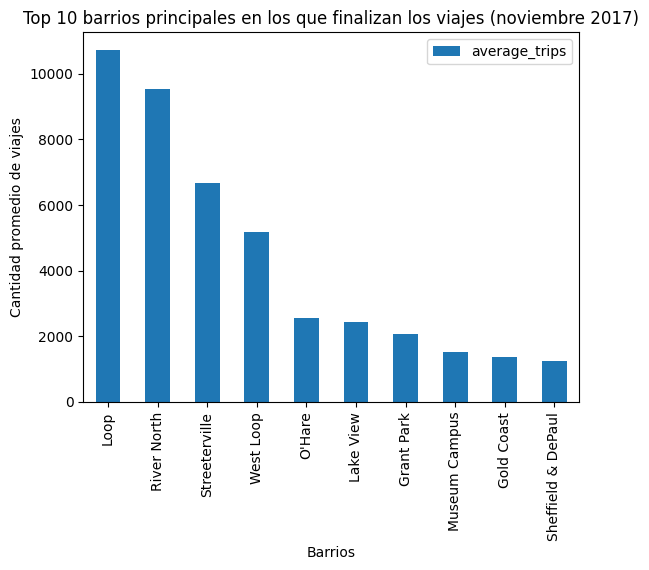

In [11]:
top10_dropoff.plot(kind='bar',title='Top 10 barrios principales en los que finalizan los viajes (noviembre 2017)', xlabel='Barrios',ylabel='Cantidad promedio de viajes')
plt.show()

A partir del gráfico se puede ver que el destino más popular de los viajes de noviembre es The Loop con más de 10000 viajes en promedio. Ello se podría deber a que dicha zona se ubica en el centro de Chicago, concentra diversos edificios y comercios, además de ser el principal distrito financiero de la ciudad. Asimismo, otros destinos que destacan son los barrios de River North, Streeterville y West Loop con más de 5000 viajes en promedio cada uno. 

2. Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones. Sacar conclusiones basadas en cada gráfico y explicar los resultados.

In [12]:
df_taxi_companies = df_taxi_companies.set_index('company_name')
top10_taxi_companies = df_taxi_companies.head(10)
print(top10_taxi_companies)

                                   trips_amount
company_name                                   
Flash Cab                                 19558
Taxi Affiliation Services                 11422
Medallion Leasin                          10367
Yellow Cab                                 9888
Taxi Affiliation Service Yellow            9299
Chicago Carriage Cab Corp                  9181
City Service                               8448
Sun Taxi                                   7701
Star North Management LLC                  7455
Blue Ribbon Taxi Association Inc.          5953


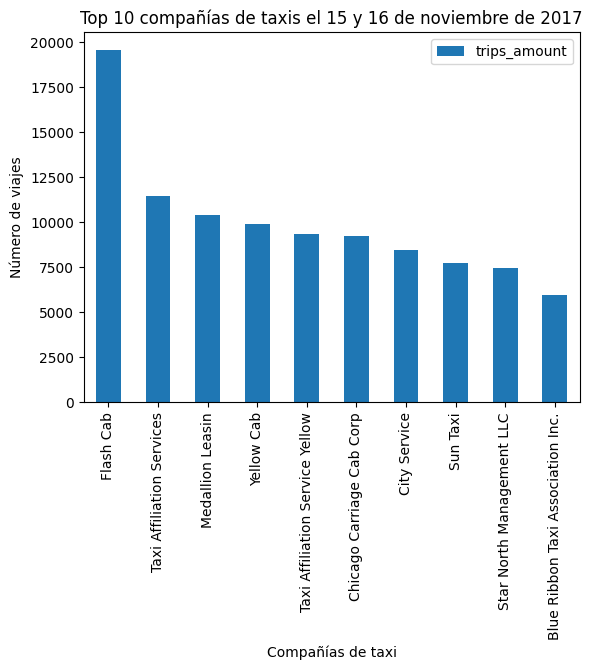

In [13]:
top10_taxi_companies.plot(kind='bar', title='Top 10 compañías de taxis el 15 y 16 de noviembre de 2017', xlabel = 'Compañías de taxi', ylabel='Número de viajes')
plt.show()

El gráfico demuestra que  las compañías Flash Cab, Taxi Affiliation Services y Medallion Leasin fueron las más populares el 15 y 16 de noviembre con más de 10000 viajes. De esas tres compañías, se destaca Flash Cab como la compañía más popular en dichos días registrando 19558 viajes en total.

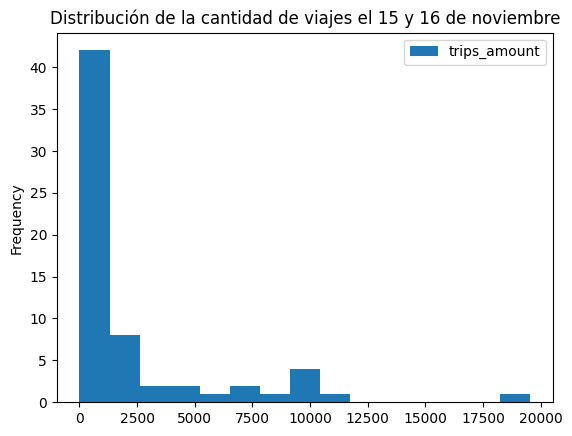

In [14]:
df_taxi_companies.plot(kind='hist', bins=15, title='Distribución de la cantidad de viajes el 15 y 16 de noviembre')
plt.show()

El histograma muestra que la mayoría de las compañías registraron menos de 2500 viajes los días 15 y 16 de noviembre. En esa línea, el caso de la compañía Flash Cab es excepcional, ya que destaca muy por encima de la mayoría de competidores.

### Prueba de hipótesis

Se probará la siguiente hipótesis: 

H0 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

H1 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

En esta ocasión, para probar la hipótesis se empleará la prueba T de student para muestras independientes, pues se quiere comparar si es que los promedios de la duración de los viajes los días sábados lluviosos y no lluviosos son iguales. Es decir, se va a tener dos muestras diferentes y se evaluará la igualdad o no de sus medias.

In [15]:
# primero se extraerá y se filtrarán los datos que correspondan al día sábado
df_loop_ohare['weekday'] = df_loop_ohare['start_ts'].dt.dayofweek
df_loop_ohare

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


Se puede ver que todas las fechas del dataframe corresponden a los días sábados, por lo que solo queda filtrar el dataframe por los días en los que llovió y los que no para después probar la hipótesis. 

In [16]:
df_rainy = df_loop_ohare[df_loop_ohare["weather_conditions"] == 'Bad']["duration_seconds"].reset_index(drop=True)
df_rainy

avg_duration_rainy = df_rainy.mean()

print("Duración promedio de los viajes los sábados lluviosos:",round(avg_duration_rainy),"segundos")

Duración promedio de los viajes los sábados lluviosos: 2427 segundos


In [18]:
df_not_rainy = df_loop_ohare[df_loop_ohare['weather_conditions'] =='Good']['duration_seconds'].reset_index(drop=True)
df_not_rainy
avg_duration_not_rainy = df_not_rainy.mean()

print("Duración promedio de los viajes los sábados no lluviosos:", round(avg_duration_not_rainy),"segundos")

Duración promedio de los viajes los sábados no lluviosos: 2000 segundos


In [19]:
# Primero se realizará la prueba de Levene para evaluar la igualdad de varianzas de las muestras
alpha= 0.05
levene=st.levene(df_rainy,df_not_rainy)
print("valor p:",levene.pvalue)
if levene.pvalue<alpha:
    print("Rechazamos la hipótesis nula:las varianzas son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: las varianzas son iguales")

valor p: 0.5332038671974493
No podemos rechazar la hipótesis nula: las varianzas son iguales


In [21]:
# se considerará la igualdad de varianzas en la prueba T de Student
results=st.ttest_ind(df_rainy,df_not_rainy,equal_var=True)
print("valor p:",results.pvalue)
if results.pvalue<alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula


Con un nivel de significación de 0.05, los datos proporcionan evidencia suficiente para rechazar la hipótesis nula.Entonces, se puede conluir que la duración promedio de los viajes los días sábados lluviosos y la duración promedio de los viajes los sábados no lluviosos son diferentes entre sí.

## Conclusión

El objetivo de este proyecto fue comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. Para ello, se llevaron a cabo los siguientes pasos:

1. Se importaron las librerías necesarias y se cargaron los datos en dataframes distintos

2. Se revisó si es que existían valores nulos y si los datos tenían el tipo de datos correcto. Es así que se convirtió el tipo de dato de la columna start_ts a datetime para poder trabajar con las horas y fechas posteriormente.

3. Posteriormente, se realizó un análisis exploratorio de los datos, se trazaron gráficos de barras e histogramas para hallar los 10 barrios más populares, así como las 10 compañías de taxi que registraron más cantidad de viajes en noviembre. 

4. Finalmente, se probó la hipótesis para determinar si factores como la lluvia afectaba la duración de los viajes usando la prueba T de Student para muestras independientes.

A partir del análisis, se llegaron a las siguientes conclusiones:

1. La zona The Loop se posiciona como el principal destino de los viajes dentro de la ciudad de Chicago en noviembre con más de 10000 viajes en promedio que se dirigen hacia allá. Otros destinos populares son River North, Streeterville y West Loop.

2. En cuanto a las empresas de taxi más populares, la compañía Flash Cab se destaca muy por encima de sus competidores con 19558 viajes en total los días 15 y 16 de noviembre. Otras empresas populares son Taxi Affiliation Services y Medalion Leasin. Sin embargo, se debe señalar que la gran mayoría de empresas no superó los 2500 viajes en dichos días. 

3. Respecto al efecto de la lluvia en la duración de los viajes, dados los resultados de la prueba T de Student, se puede comprobar que la duración promedio de los viajes los sábados lluviosos es diferente a la duración promedio de los viajes los sábados en los que no llueve. Es decir, hay un cambio en la duración promedio de los viajes dependiendo del clima. 

4. Incluso, se pudo notar que los sábados en los que llueve la duración de los viajes es mayor a cuando no llueve, lo cual contradice el pensamiento común que se tiene respecto a que las personas no viajan tanto cuando llueve. El análisis parece indicar que, por el contrario, las personas tienden a hacer viajes más largos los días de lluvia. 